<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV

**1. DATA PREPROCESSING**

**a) Loading the Dataset**

In [35]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [58]:
data.shape

(7043, 21)

**b) Checking for Missing Values**

In [59]:
data.isnull().sum().to_frame().rename(columns={0:"No. of Missing Values"})

,No. of Missing Values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There are no missing values

In [5]:
data = data.drop(columns = ["customerID"])

In [5]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EXPLORATORY DATA ANALYSIS

In [6]:
data_cat = data.drop(columns=['MonthlyCharges','SeniorCitizen'])
for col in data_cat.columns:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [7]:
data['TotalCharges'] = data['MonthlyCharges']*data['tenure']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [9]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1936.30,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,107.70,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1903.50,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.40,1


**2. LOGISTINC REGRESSION MODEL BUILDING**

**a) Split the dataset into Training and Testing Dataset**

In [18]:
x = data.drop(columns=["Churn"])
y = data["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6859 to 6730
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int64  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int64  
 3   Dependents        5634 non-null   int64  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int64  
 6   MultipleLines     5634 non-null   int64  
 7   InternetService   5634 non-null   int64  
 8   OnlineSecurity    5634 non-null   int64  
 9   OnlineBackup      5634 non-null   int64  
 10  DeviceProtection  5634 non-null   int64  
 11  TechSupport       5634 non-null   int64  
 12  StreamingTV       5634 non-null   int64  
 13  StreamingMovies   5634 non-null   int64  
 14  Contract          5634 non-null   int64  
 15  PaperlessBilling  5634 non-null   int64  
 16  PaymentMethod     5634 non-null   int64

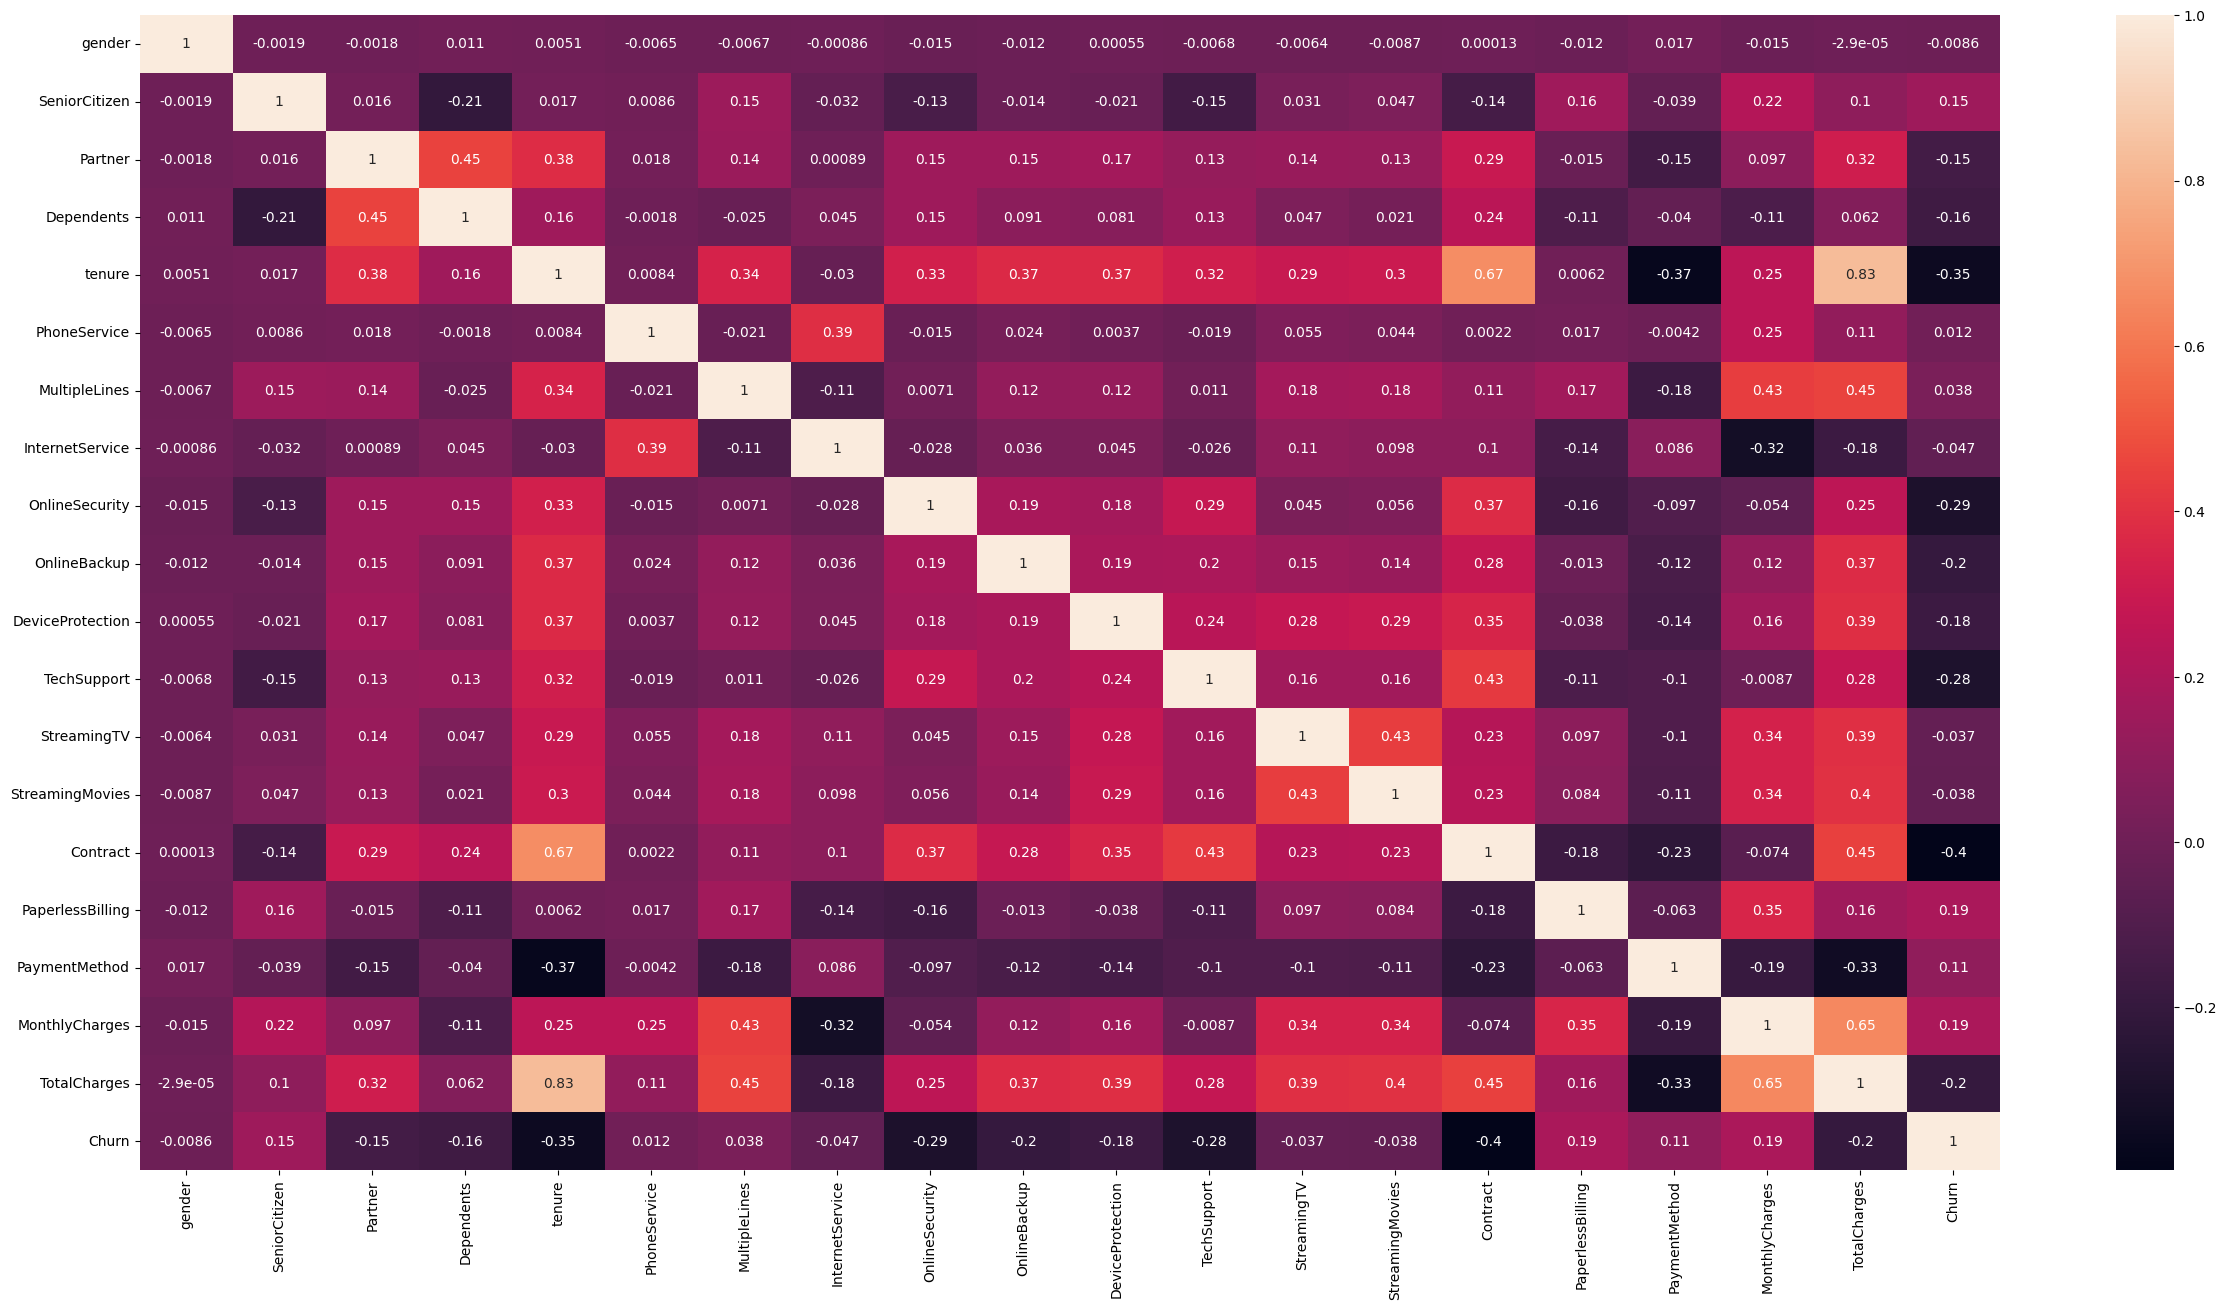

In [19]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

**b) Building a baseline logistic regression model using default settings.**

In [20]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

**c) Training and predicting the model on the Training Dataset**

In [21]:
pred = model.predict(x_test)

**3. MODEL EVALUATION AND VISUALISATION**

a. Evaluating the model&#39;s performance on the testing data using the following metrics:
- Accuracy
- Precision
- Recall
- F1-score
- ROC AUC
- Cohen&#39;s Kappa Score
- Matthews Correlation Coefficient

In [23]:
#The number of classifications a model correctly predicts divided by the total number of predictions
print('Accuracy: %.3f' % accuracy_score(y_test, pred))
#Precision is the quality of a positive prediction made by the model
print('Precision: %.3f' % precision_score(y_test, pred))
#Recall is the number of data samples that a machine learning model correctly identifies as belonging to a class of interest
print('Recall: %.3f' % recall_score(y_test, pred))
#F-Beta Score is a measure of resr's accuracy
print('F1 Score: %.3f' % f1_score(y_test,pred))

Accuracy: 0.810
Precision: 0.690
Recall: 0.570
F1 Score: 0.624


In [24]:
import sklearn
# The ROC AUC score tells us how efficient the model is. The higher the score, the better the model is at distinguish the positive and negative classes
roc_auc_score = sklearn.metrics.roc_auc_score(y_test,pred)
# Cohen kappa score is a statistical measure of interrater agreement for categorical data
cohen = sklearn.metrics.cohen_kappa_score(y_test,pred)
# Mathew's Correlation Coefficient is to gauge the difference between the predicted values and actual values and is equivalent to chi-square statistics for a 2*2 contingency table
mat = sklearn.metrics.matthews_corrcoef(y_test, pred)
print("ROC-AUC Score: ",roc_auc_score)
print("Cohen Kappa Score: ",cohen)
print("Matthews Correlation Coefficient: ", mat)
# The MCC and Kappa are more reliable statistical measures when it comes to imbalanced class distribution

ROC-AUC Score:  0.7358991655200758
Cohen Kappa Score:  0.498547262930068
Matthews Correlation Coefficient:  0.5026323100864548


b) Creating a Confusion Matrix

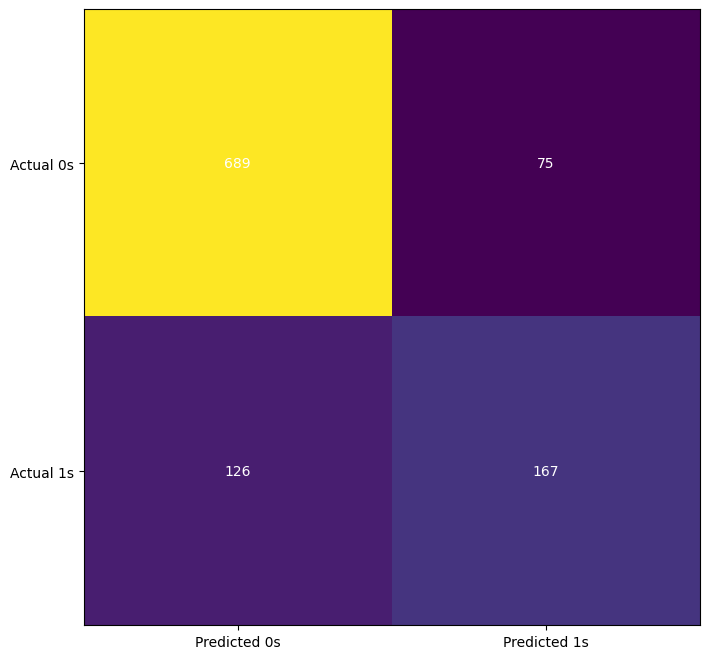

In [25]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

**c) Plotting the ROC curve and Calculating the AUC**

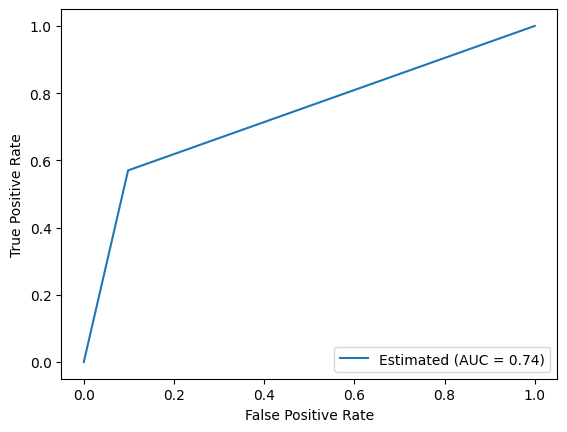

In [26]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, pred)
roc_auc = sklearn.metrics.auc(fpr, tpr)
display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Estimated')
display.plot()
plt.show()

**d) Visualising the Precision-Recall Curve**

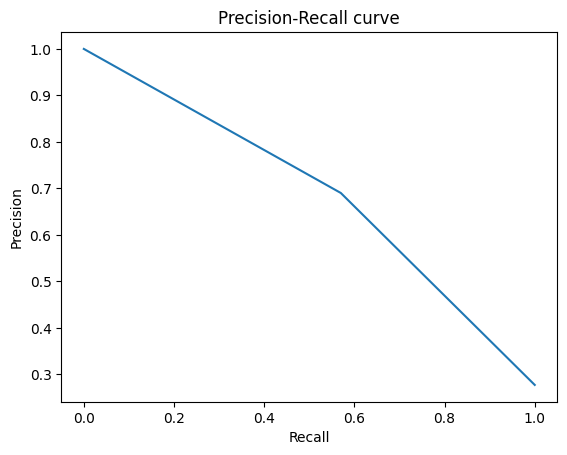

In [27]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, pred)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()

In [30]:
loss = sklearn.metrics.log_loss(y_test,prob)
loss

0.4116886598283462

In [29]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
prob = logreg.predict_proba(x_test)

**e) Plotting the Log Loss Function Curve during Model Training and Testing**

In [31]:
import numpy as np
import sklearn
thresholds = np.linspace(0.01,0.99,100)
train_log_loss= []
test_log_loss = []
for thresh in thresholds:
  pre = logreg.predict_proba(x_train)[:,1]>=thresh
  loss = sklearn.metrics.log_loss(y_train,pre)
  train_log_loss.append(loss)
  pres = logreg.predict_proba(x_test)[:,1]>=thresh
  loss = sklearn.metrics.log_loss(y_test,pres)
  test_log_loss.append(loss)

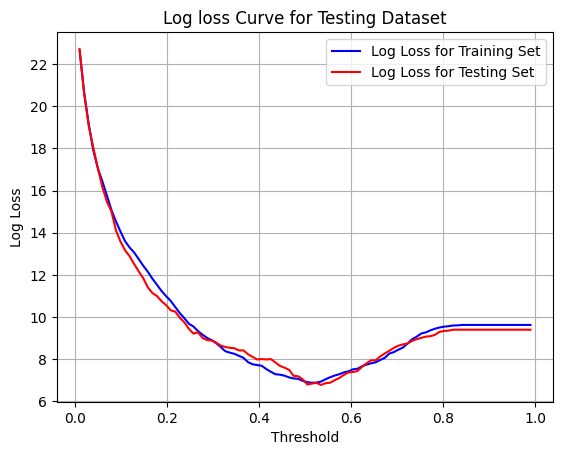

In [24]:
plt.plot(thresholds,train_log_loss,label="Log Loss for Training Set",color="blue")
plt.plot(thresholds,test_log_loss, label = "Log Loss for Testing Set",color="red")
plt.xlabel("Threshold")
plt.ylabel("Log Loss")
plt.title("Log loss Curve for Testing Dataset")
plt.legend()
plt.grid()
plt.show()

In [32]:
x_values = x_test['MonthlyCharges'].values

In [33]:
x_test.shape

(1057, 19)

In [34]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
439,1,0,0,0,1,1,0,0,0,0,2,2,0,0,0,0,3,55.05,55.05
4035,1,0,1,1,52,1,2,1,0,2,0,2,0,2,0,1,0,93.25,4849.00
6593,1,0,1,0,55,0,1,0,0,0,2,2,2,2,0,1,0,54.55,3000.25
1870,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3,45.55,45.55
4402,1,0,0,0,39,0,1,0,2,2,0,2,2,0,0,1,1,48.95,1909.05


In [34]:
probs = logreg.predict_proba(x_test)[:,1]

In [35]:
x_values.shape

(7043,)

In [37]:
probs.shape

(1761,)

**4. Sigmoid Curve**

The sigmoid curve can be used to understand how a machine learning algorithm learns complex problems

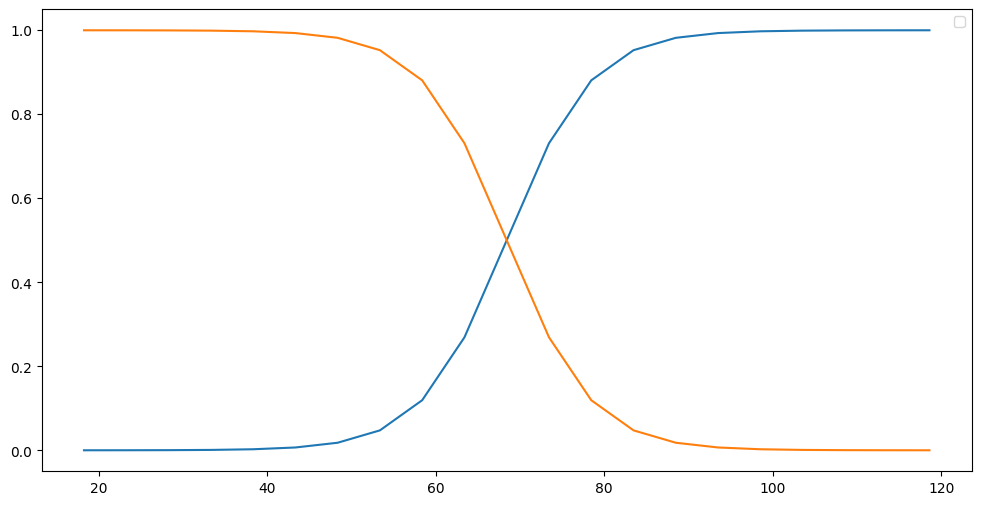

In [38]:
prob1,prob0 = [],[]
#x1 = [i for i in range(-10,11)]
x_min = min(x_values)
x_max = max(x_values)
x_range = np.linspace(x_min,x_max,21)
for instance in x1:
  p1 = 1/(1+np.exp(-(instance)))
  p0 = 1 - p1
  prob1.append(p1)
  prob0.append(p0)
plt.figure(figsize=(12,6))
plt.plot(x_range,prob1)
plt.plot(x_range,prob0)
plt.legend()
plt.show()

**5. Hyperparameter Tuning**

a) Performing hyperparamtere tuning to optimise the logistic regression model

In [ ]:
params = [
    {'penalty' : ['11','12','elasticnet','none'],
     'C': np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,1000,2500,5000]}
]

In [ ]:
log = LogisticRegression()

In [ ]:
grid_search = GridSearchCV(log, param_grid=params)
grid_search.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['11', '12', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [ ]:
accuracies = {'train accuracy': grid_search.score(x_train,y_train),
              'test accuracy' : grid_search.score(x_test,y_test)}
print(*accuracies.items())

('train accuracy', 0.8017796289284362) ('test accuracy', 0.8080636002271436)


b) How Hyperparameter Tuning Affects Model Performace:
- By selecting the right hyperparameters, such as learning rate and regularisation, among others, a model can achieve optimal performance

**6. Recommendations**

TelCox may proactively handle customer churn, retain important clients, and maximize their retention efforts by implementing dynamic pricing methods and churn prediction warnings based on the model's behavior. These technological suggestions use the model's predictive power to conduct targeted real-time actions, lowering churn and raising customer happiness.